In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os
import json
from datetime import datetime
from sklearn import metrics

In [2]:
dataset = pd.read_csv('final.csv')

In [3]:
df=dataset[dataset['elimination']==1].copy()

In [4]:
dataset

,Unnamed: 0,Device_ID,Event_ID,Event_start_time,Tare_weight,max_10_dev,max_10_dur,Total_Tare_weight,hour_day,Tags,...,std_sum,duration_of_event,count_max_shift,count_min_shift,ratio_10_weight,ratio_min_weight,ratio_min_10_weight,cat_in_box,month,elimination
0,0,VA00000000000022,RXZlbnRJbmZvcm1hdGlvbjplZTIwZDI4MC1iMTNkLTQwYj...,2020-10-02 16:14:13,"[4882, 2049, 1642, 3099]",11700.0,0.274712,11672,16.2,"['cat in box', 'defecation']",...,2032.140749,201.574933,0.000000,0.034727,-0.006322,-0.006096,0.000226,1,10,1
1,1,VA00000000000037,RXZlbnRJbmZvcm1hdGlvbjo0MzdlNTU1MS1hODQ2LTQyMW...,2021-10-12 14:10:23,"[487, 2189, 1157, 4353]",8180.0,0.478588,8186,14.2,"['urination', 'cat in box']",...,2328.319056,123.174941,0.251675,0.194845,0.001295,0.004316,0.003021,1,10,1
2,2,VA00000000000037,RXZlbnRJbmZvcm1hdGlvbjo0NDM5M2M2ZS1iYTQ5LTRhMD...,2021-10-15 15:31:15,"[426, 1997, 737, 4750]",7910.0,0.679067,7910,15.5,"['non_elimination', 'cat in box']",...,936.702194,63.174944,0.031658,0.047487,0.000000,-0.000203,-0.000203,1,10,0
3,3,VA00000000000037,RXZlbnRJbmZvcm1hdGlvbjo0NjgwYjJhMy00MjQzLTQwOD...,2021-01-11 13:19:24,"[1752, -158, 1626, 4359]",7600.0,0.158181,7579,13.3,"['cat in box', 'defecation']",...,2634.601155,170.374946,0.058694,0.164343,-0.003811,0.004537,0.008348,1,1,1
4,4,VA00000000000037,RXZlbnRJbmZvcm1hdGlvbjo0NjhiZGY1Mi0wNzMyLTQzOD...,2021-01-13 13:01:52,"[1584, -948, 3099, 3569]",7340.0,0.151584,7304,13.0,"['cat in box', 'defecation']",...,2434.302037,229.574936,0.361538,0.021779,-0.006518,-0.005070,0.001448,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12055,12058,VB00000000000192,RXZlbnRJbmZvcm1hdGlvbjplOTY1YzllOC01YWU1LTRmYj...,2021-08-24 01:36:18,"[2340, 868, 2150, 1626]",7030.0,0.120506,6984,1.6,"['urination', 'cat in box']",...,1583.759646,59.125914,0.608870,0.169131,-0.011176,0.229349,0.240525,1,8,1
12056,12059,VB00000000000192,RXZlbnRJbmZvcm1hdGlvbjpmNDMxM2YwNi1hNzk0LTQxMG...,2021-04-26 06:29:01,"[3577, 400, 2043, 1747]",7750.0,0.404291,7767,6.5,"['cat in box', 'non_elimination']",...,1390.112340,132.144766,0.045405,0.136214,0.003692,0.012163,0.008471,1,4,0
12057,12060,VB00000000000192,RXZlbnRJbmZvcm1hdGlvbjpmYjQ3YzJkZi03ODY3LTQ3Zm...,2021-04-27 03:47:55,"[4313, -14729, 1754, 1697]",7600.0,0.294585,-6965,3.8,"['urination', 'cat in box']",...,2186.401587,137.820918,0.000000,0.500650,-3.298234,-3.293478,0.004755,1,4,1
12058,12061,VB00000000000192,RXZlbnRJbmZvcm1hdGlvbjpmYTY2MzA0OC1kNjQ1LTQ5OD...,2021-09-02 01:15:57,"[3702, -893, 1561, 1940]",10710.0,0.113082,6310,1.2,"['cat in box', 'defecation']",...,976.953183,205.381823,0.223973,0.043821,-1.003192,-0.005016,0.998176,1,9,1


In [5]:
dataset.dropna(inplace=True)
dataset.reset_index(inplace=True)
dataset.drop(['index','Unnamed: 0'],axis=1,inplace=True)

In [6]:
dataset.drop(['Device_ID','Event_start_time','Event_ID','Tare_weight','Tags','Name_of_cat'],axis=1,inplace=True)

In [7]:
dataset.isnull().sum()

max_10_dev             0
max_10_dur             0
Total_Tare_weight      0
hour_day               0
Weight_of_cat          0
min_sum                0
max_sum                0
mean_sum               0
std_sum                0
duration_of_event      0
count_max_shift        0
count_min_shift        0
ratio_10_weight        0
ratio_min_weight       0
ratio_min_10_weight    0
cat_in_box             0
month                  0
elimination            0
dtype: int64

In [8]:
np.isinf(dataset).values.sum()

0

In [9]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [12]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [13]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [0 0]
 [1 1]
 ...
 [1 1]
 [0 0]
 [1 1]]


[[ 725  230]
 [ 210 1844]]
precision : 0.8679923165679427
accuracy : 0.8537720172814889


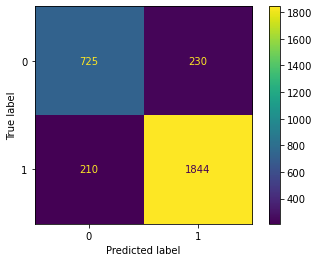

In [14]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('precision :',metrics.average_precision_score(y_test, y_pred))
print('accuracy :',accuracy_score(y_test, y_pred))
from sklearn.metrics import ConfusionMatrixDisplay
cmd = ConfusionMatrixDisplay(cm,display_labels= classifier.classes_)
cmd.plot()
plt.show()

In [15]:
dsx=[]
for i in range(dataset.shape[0]):
        x=classifier.predict(sc.transform([X[i]]))
        dsx.append(x[0])

[[3576  230]
 [ 210 8018]]
precision : 0.9647541148553573
accuracy : 0.9634369287020109


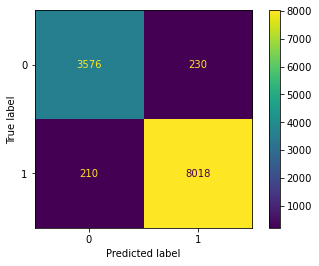

In [16]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y,dsx)
print(cm)
print('precision :',metrics.average_precision_score(y,dsx))
print('accuracy :',accuracy_score(y,dsx))
from sklearn.metrics import ConfusionMatrixDisplay
cmd = ConfusionMatrixDisplay(cm,display_labels= classifier.classes_)
cmd.plot()
plt.show()

In [17]:
df

,Unnamed: 0,Device_ID,Event_ID,Event_start_time,Tare_weight,max_10_dev,max_10_dur,Total_Tare_weight,hour_day,Tags,...,std_sum,duration_of_event,count_max_shift,count_min_shift,ratio_10_weight,ratio_min_weight,ratio_min_10_weight,cat_in_box,month,elimination
0,0,VA00000000000022,RXZlbnRJbmZvcm1hdGlvbjplZTIwZDI4MC1iMTNkLTQwYj...,2020-10-02 16:14:13,"[4882, 2049, 1642, 3099]",11700.0,0.274712,11672,16.2,"['cat in box', 'defecation']",...,2032.140749,201.574933,0.000000,0.034727,-0.006322,-0.006096,0.000226,1,10,1
1,1,VA00000000000037,RXZlbnRJbmZvcm1hdGlvbjo0MzdlNTU1MS1hODQ2LTQyMW...,2021-10-12 14:10:23,"[487, 2189, 1157, 4353]",8180.0,0.478588,8186,14.2,"['urination', 'cat in box']",...,2328.319056,123.174941,0.251675,0.194845,0.001295,0.004316,0.003021,1,10,1
3,3,VA00000000000037,RXZlbnRJbmZvcm1hdGlvbjo0NjgwYjJhMy00MjQzLTQwOD...,2021-01-11 13:19:24,"[1752, -158, 1626, 4359]",7600.0,0.158181,7579,13.3,"['cat in box', 'defecation']",...,2634.601155,170.374946,0.058694,0.164343,-0.003811,0.004537,0.008348,1,1,1
4,4,VA00000000000037,RXZlbnRJbmZvcm1hdGlvbjo0NjhiZGY1Mi0wNzMyLTQzOD...,2021-01-13 13:01:52,"[1584, -948, 3099, 3569]",7340.0,0.151584,7304,13.0,"['cat in box', 'defecation']",...,2434.302037,229.574936,0.361538,0.021779,-0.006518,-0.005070,0.001448,1,1,1
5,5,VA00000000000037,RXZlbnRJbmZvcm1hdGlvbjo0OTFiMTg2Ni1hMGUwLTQ4NT...,2020-12-06 07:01:38,"[679, 95, 2875, 3166]",6850.0,0.172170,6815,7.0,"['cat in box', 'urination']",...,2568.449412,183.974934,0.184808,0.103275,-0.006360,-0.004543,0.001817,1,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12053,12056,VB00000000000192,RXZlbnRJbmZvcm1hdGlvbjplNDg0ZmE4Ny02NjUxLTRiMz...,2021-04-29 16:08:23,"[3484, 91, 871, 2875]",7350.0,0.119604,7321,16.1,"['cat in box', 'defecation']",...,1813.659068,280.508458,0.274502,0.249547,-0.006561,-0.004299,0.002262,1,4,1
12055,12058,VB00000000000192,RXZlbnRJbmZvcm1hdGlvbjplOTY1YzllOC01YWU1LTRmYj...,2021-08-24 01:36:18,"[2340, 868, 2150, 1626]",7030.0,0.120506,6984,1.6,"['urination', 'cat in box']",...,1583.759646,59.125914,0.608870,0.169131,-0.011176,0.229349,0.240525,1,8,1
12057,12060,VB00000000000192,RXZlbnRJbmZvcm1hdGlvbjpmYjQ3YzJkZi03ODY3LTQ3Zm...,2021-04-27 03:47:55,"[4313, -14729, 1754, 1697]",7600.0,0.294585,-6965,3.8,"['urination', 'cat in box']",...,2186.401587,137.820918,0.000000,0.500650,-3.298234,-3.293478,0.004755,1,4,1
12058,12061,VB00000000000192,RXZlbnRJbmZvcm1hdGlvbjpmYTY2MzA0OC1kNjQ1LTQ5OD...,2021-09-02 01:15:57,"[3702, -893, 1561, 1940]",10710.0,0.113082,6310,1.2,"['cat in box', 'defecation']",...,976.953183,205.381823,0.223973,0.043821,-1.003192,-0.005016,0.998176,1,9,1


In [18]:
df.dropna(inplace=True)
df.reset_index(inplace=True)
df.drop(['index','Unnamed: 0','elimination'],axis=1,inplace=True)
df['defecation']=0
for i in range(df.shape[0]):
    if 'urination' in df['Tags'][i]:
        df['defecation'][i]=1  

C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_34052\1581227289.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['defecation'][i]=1


In [19]:
df.drop(['Device_ID','Event_start_time','Event_ID','Tare_weight','Tags','Name_of_cat'],axis=1,inplace=True)

In [20]:
df.isnull().sum()

max_10_dev             0
max_10_dur             0
Total_Tare_weight      0
hour_day               0
Weight_of_cat          0
min_sum                0
max_sum                0
mean_sum               0
std_sum                0
duration_of_event      0
count_max_shift        0
count_min_shift        0
ratio_10_weight        0
ratio_min_weight       0
ratio_min_10_weight    0
cat_in_box             0
month                  0
defecation             0
dtype: int64

In [21]:
np.isinf(df).values.sum()

0

In [22]:
X1 = df.iloc[:, :-1].values
y1= df.iloc[:, -1].values

In [23]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.25, random_state = 0)

In [24]:
from sklearn.preprocessing import StandardScaler
sc1 = StandardScaler()
X1_train = sc1.fit_transform(X1_train)
X1_test = sc1.transform(X1_test)

In [25]:
from sklearn.tree import DecisionTreeClassifier
classifier1 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier1.fit(X1_train, y1_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [26]:
y1_pred = classifier1.predict(X1_test)
print(np.concatenate((y1_pred.reshape(len(y1_pred),1), y1_test.reshape(len(y1_test),1)),1))

[[0 1]
 [1 1]
 [1 1]
 ...
 [1 1]
 [0 0]
 [1 1]]


[[ 306  204]
 [ 199 1348]]
precision : 0.8535718099641139
accuracy : 0.8040836169178415


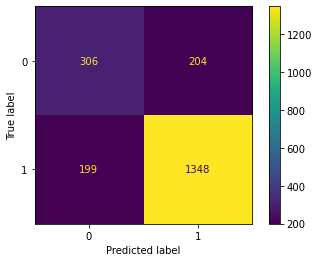

In [27]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm1= confusion_matrix(y1_test, y1_pred)
print(cm1)
print('precision :',metrics.average_precision_score(y1_test, y1_pred))
print('accuracy :',accuracy_score(y1_test, y1_pred))
from sklearn.metrics import ConfusionMatrixDisplay
cmd = ConfusionMatrixDisplay(cm1,display_labels= classifier.classes_)
cmd.plot()
plt.show()

In [28]:
dsx1=[]
for i in range(df.shape[0]):
        x1=classifier1.predict(sc.transform([X1[i]]))
        dsx1.append(x1[0])

[[1535  585]
 [1229 4879]]
precision : 0.8626346597808409
accuracy 0.7795333009236752


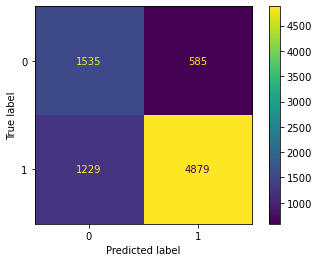

In [29]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm1= confusion_matrix(y1,dsx1)
print(cm1)
print('precision :',metrics.average_precision_score(y1,dsx1))
print('accuracy',accuracy_score(y1,dsx1))
from sklearn.metrics import ConfusionMatrixDisplay
cmd = ConfusionMatrixDisplay(cm1,display_labels= classifier.classes_)
cmd.plot()
plt.show()

In [30]:
df1=pd.read_csv('final.csv')

In [31]:
df1.dropna(inplace=True)
df1.reset_index(inplace=True)
df1.drop(['index','Unnamed: 0'],axis=1,inplace=True)

In [32]:
df1

,Device_ID,Event_ID,Event_start_time,Tare_weight,max_10_dev,max_10_dur,Total_Tare_weight,hour_day,Tags,Name_of_cat,...,std_sum,duration_of_event,count_max_shift,count_min_shift,ratio_10_weight,ratio_min_weight,ratio_min_10_weight,cat_in_box,month,elimination
0,VA00000000000022,RXZlbnRJbmZvcm1hdGlvbjplZTIwZDI4MC1iMTNkLTQwYj...,2020-10-02 16:14:13,"[4882, 2049, 1642, 3099]",11700.0,0.274712,11672,16.2,"['cat in box', 'defecation']",Sparkler,...,2032.140749,201.574933,0.000000,0.034727,-0.006322,-0.006096,0.000226,1,10,1
1,VA00000000000037,RXZlbnRJbmZvcm1hdGlvbjo0MzdlNTU1MS1hODQ2LTQyMW...,2021-10-12 14:10:23,"[487, 2189, 1157, 4353]",8180.0,0.478588,8186,14.2,"['urination', 'cat in box']",Negan,...,2328.319056,123.174941,0.251675,0.194845,0.001295,0.004316,0.003021,1,10,1
2,VA00000000000037,RXZlbnRJbmZvcm1hdGlvbjo0NDM5M2M2ZS1iYTQ5LTRhMD...,2021-10-15 15:31:15,"[426, 1997, 737, 4750]",7910.0,0.679067,7910,15.5,"['non_elimination', 'cat in box']",Negan,...,936.702194,63.174944,0.031658,0.047487,0.000000,-0.000203,-0.000203,1,10,0
3,VA00000000000037,RXZlbnRJbmZvcm1hdGlvbjo0NjgwYjJhMy00MjQzLTQwOD...,2021-01-11 13:19:24,"[1752, -158, 1626, 4359]",7600.0,0.158181,7579,13.3,"['cat in box', 'defecation']",Negan,...,2634.601155,170.374946,0.058694,0.164343,-0.003811,0.004537,0.008348,1,1,1
4,VA00000000000037,RXZlbnRJbmZvcm1hdGlvbjo0NjhiZGY1Mi0wNzMyLTQzOD...,2021-01-13 13:01:52,"[1584, -948, 3099, 3569]",7340.0,0.151584,7304,13.0,"['cat in box', 'defecation']",Negan,...,2434.302037,229.574936,0.361538,0.021779,-0.006518,-0.005070,0.001448,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12029,VB00000000000192,RXZlbnRJbmZvcm1hdGlvbjplOTY1YzllOC01YWU1LTRmYj...,2021-08-24 01:36:18,"[2340, 868, 2150, 1626]",7030.0,0.120506,6984,1.6,"['urination', 'cat in box']",Sparkler,...,1583.759646,59.125914,0.608870,0.169131,-0.011176,0.229349,0.240525,1,8,1
12030,VB00000000000192,RXZlbnRJbmZvcm1hdGlvbjpmNDMxM2YwNi1hNzk0LTQxMG...,2021-04-26 06:29:01,"[3577, 400, 2043, 1747]",7750.0,0.404291,7767,6.5,"['cat in box', 'non_elimination']",Sparkler,...,1390.112340,132.144766,0.045405,0.136214,0.003692,0.012163,0.008471,1,4,0
12031,VB00000000000192,RXZlbnRJbmZvcm1hdGlvbjpmYjQ3YzJkZi03ODY3LTQ3Zm...,2021-04-27 03:47:55,"[4313, -14729, 1754, 1697]",7600.0,0.294585,-6965,3.8,"['urination', 'cat in box']",Sparkler,...,2186.401587,137.820918,0.000000,0.500650,-3.298234,-3.293478,0.004755,1,4,1
12032,VB00000000000192,RXZlbnRJbmZvcm1hdGlvbjpmYTY2MzA0OC1kNjQ1LTQ5OD...,2021-09-02 01:15:57,"[3702, -893, 1561, 1940]",10710.0,0.113082,6310,1.2,"['cat in box', 'defecation']",Sparkler,...,976.953183,205.381823,0.223973,0.043821,-1.003192,-0.005016,0.998176,1,9,1


In [33]:
df1['elimination']=0
df1['defecation']=2

In [34]:
for i in range(df1.shape[0]):
    if 'defecation' in df1['Tags'][i]:
        df1['elimination'][i]=1
        df1['defecation'][i]=0
    if 'urination' in df1['Tags'][i]:
        df1['elimination'][i]=1
        df1['defecation'][i]=1

C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_34052\1654308507.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['elimination'][i]=1
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_34052\1654308507.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['defecation'][i]=0
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_34052\1654308507.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['elimination'][i

In [35]:
df2=df1.copy()

In [36]:
df1.drop(['Device_ID','Event_start_time','Event_ID','Tare_weight','Tags','Name_of_cat'],axis=1,inplace=True)

In [37]:
df1

,max_10_dev,max_10_dur,Total_Tare_weight,hour_day,Weight_of_cat,min_sum,max_sum,mean_sum,std_sum,duration_of_event,count_max_shift,count_min_shift,ratio_10_weight,ratio_min_weight,ratio_min_10_weight,cat_in_box,month,elimination,defecation
0,11700.0,0.274712,11672,16.2,4429,11699,17020,14796.140870,2032.140749,201.574933,0.000000,0.034727,-0.006322,-0.006096,0.000226,1,10,1,0
1,8180.0,0.478588,8186,14.2,4634,8166,14423,10534.855520,2328.319056,123.174941,0.251675,0.194845,0.001295,0.004316,0.003021,1,10,1,1
2,7910.0,0.679067,7910,15.5,4920,7911,13268,8123.100870,936.702194,63.174944,0.031658,0.047487,0.000000,-0.000203,-0.000203,1,10,0,2
3,7600.0,0.158181,7579,13.3,5510,7554,14302,11161.678700,2634.601155,170.374946,0.058694,0.164343,-0.003811,0.004537,0.008348,1,1,1,0
4,7340.0,0.151584,7304,13.0,5523,7332,13929,11382.558800,2434.302037,229.574936,0.361538,0.021779,-0.006518,-0.005070,0.001448,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12029,7030.0,0.120506,6984,1.6,4116,6040,13033,10371.323900,1583.759646,59.125914,0.608870,0.169131,-0.011176,0.229349,0.240525,1,8,1,1
12030,7750.0,0.404291,7767,6.5,4604,7711,13016,8288.571913,1390.112340,132.144766,0.045405,0.136214,0.003692,0.012163,0.008471,1,4,0,2
12031,7600.0,0.294585,-6965,3.8,4416,7579,12509,10080.843210,2186.401587,137.820918,0.000000,0.500650,-3.298234,-3.293478,0.004755,1,4,1,1
12032,10710.0,0.113082,6310,1.2,4386,6332,11965,10486.627550,976.953183,205.381823,0.223973,0.043821,-1.003192,-0.005016,0.998176,1,9,1,0


In [38]:
X2 = df1.iloc[:, :-2].values
y2= df1.iloc[:, -2].values
y3=df1.iloc[:,-1]

In [39]:
temp2=[]
temp3=[]

for i in range(df1.shape[0]):
    if classifier.predict(sc.transform([X2[i]]))[0]==1:
        temp2.append(1)
        if classifier1.predict(sc1.transform([X2[i]]))[0]==0:
            temp3.append(0)
        else:
            temp3.append(1)
    else:
        temp3.append(2)
        temp2.append(0)
    

In [42]:
count=0
for i in range(df1.shape[0]):
    if (y3[i]!=temp3[i]):
        count=count+1
print('final false predicted from data:',count)   

final false predicted from data: 832
